# Machine Learning Project

We will go through an example project end to end

From: *Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*, Aurélien Géron, 2017

## Working with Real Data
**Popular open data repositories**
- [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Amazon’s AWS datasets](https://registry.opendata.aws/)

**Meta portals (they list open data repositories)**
- [Data Portals](http://dataportals.org/)
- [OpenDataMonitor](http://opendatamonitor.eu/)
 -[Quandl](http://quandl.com/)
 
**Other pages listing many popular open data repositories**
- [Wikipedia’s list of Machine Learning datasets](https://homl.info/9)
- [Quora.com](https://homl.info/10)
- [The datasets subreddit](https://www.reddit.com/r/datasets)

## Download the Data

Download a single compressed file, `housing.tgz`, which
contains a comma-separated value (CSV) file called `housing.csv` with all the data.

[California housing prices]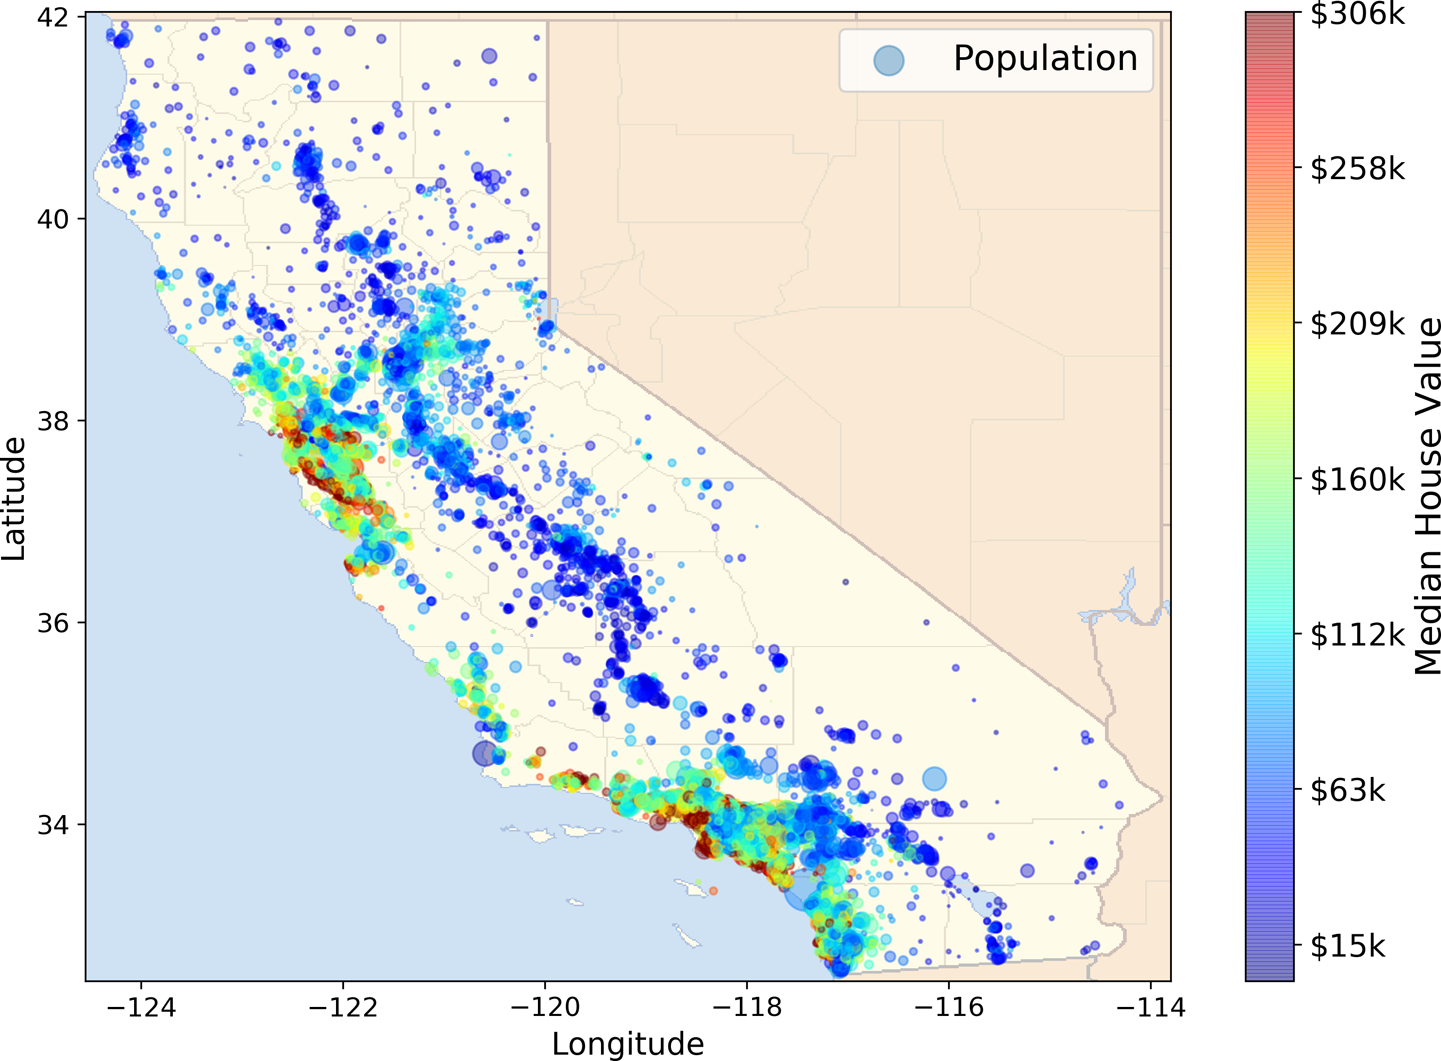



In [1]:
# function to fetch the data:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"

HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

`fetch_housing_data()` creates a `datasets/housing` directory in the current workspace, downloads the `housing.tgz` file, and extracts the ' `housing.csv` from it in this directory

In [2]:
fetch_housing_data()

In [3]:
# load the data using Pandas by creating a small function:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
# the function returns a Pandas DataFrame object containing all the data
housing = load_housing_data()
housing.head() # display the data head

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. 
There are 10 attributes (you can see the first 6 in the screenshot):
`longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, and `ocean_proximity`.

The `info()` method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- There are 20,640 instances in the dataset.
- Total_bedrooms attribute has only 20,433 nonnull values
- All attributes are numerical, except the `ocean_proximity` field (has type `object` - it could hold any kind of Python object, but since it was loaded from a CSV file it must be a text attribute.

What categories exist and how many districts belong to each category?  We can know that by using the `value_counts()` method:


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The `describe()` method shows a summary of the numerical attributes:

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another to a get quick feel of the type of data we are dealing with is to plot a histogram for each numerical attribute:

In [8]:
%matplotlib inline  
# only in a Jupyter notebook
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

## Create a Test Set

We must have a:
- training set: to learn the model
- test set: to check the model perfomance

Creating a test set is theoretically simple: just pick some instances randomly, typically 20% of the dataset, and set them aside:

In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

This function can be used like this:

In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

This function creates a different test and train set every time it is run!

Two ways to avoid it:
- save the test and train set on the first run
- set the random generator seed: p.ex. `np.random.seed(24)` before calling `np.random.permutation()`

These solutions will break next time we fetch an updated dataset!
- a common solution each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier). 

Example: compute a hash of each instance’s identifier, keep only the last byte of the hash, and put the instance in the test set if this value is lower or equal to 51 (~20% of 256).
- The test set will remain consistent across multiple runs, even if the datase is refreshed. 
- The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set. 

Here is a possible implementation:

In [ ]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

Since the `housing` dataset does not have an identifier column, the simplest solution is to use the row index as the ID:

In [ ]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

- If we use the row index as a unique identifier, we need be sure that new data gets appended to the end of the dataset, and no row ever gets deleted.

- If this is not possible, then we can try to use the most stable features to build a unique identifier.

Example: A district’s latitude and longitude are guaranteed to be stable for a few million years. We can combine them into an ID like:

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Scikit-Learn provides a few functions to split datasets into multiple subsets like `train_test_split`:


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Discover and Visualize the Data to Gain Insights

Let’s create a copy of the training set so that we can work with it without harming it:


In [ ]:
housing = train_set.copy()

### Visualizing Geographical Data

It is nice to create a scatterplot of all districts to visualize the data since there is geographical information (latitude and longitude):

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

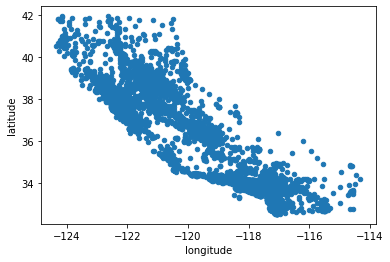

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")


Setting the `alpha` option to `0.1` makes it much easier to visualize the places where there is a high density of data points:

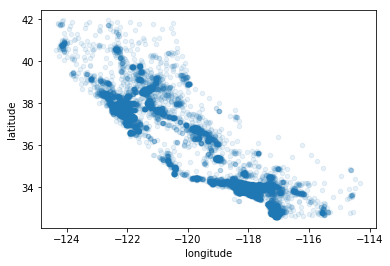

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now we can clearly see the high-density areas.

Let’s look at the housing prices:
- The radius of each circle represents the district’s population (option `s`)
- The color represents the price (option `c`)

A predefined color map (option `cmap`) called `jet` is used which ranges from blue (low values) to red (high prices):

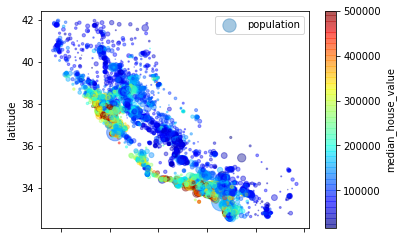

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,) 
plt.legend()

This image tells us that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density.

It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster
centers.

### Looking for Correlations

Since the dataset is not too large we compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the `corr()` method:

In [ ]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

Correlation coefficient ranges from –1 to 1. 
- Close to 1 -> there is a strong positive correlation; 
   * Example: the median house value tends to go up when the median income goes up.
- Close to –1 ->there is a strong negative correlation;
   * Example: we can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when we go north). 
- Coefficients close to zero mean that there is no linear correlation. 

The next figure shows various plots along with the correlation coefficient between their horizontal and vertical axes.
![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png)

**Important**:  The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). 

It may completely miss out on nonlinear relationships (e.g., “if x is close to zero then y generally goes up”). 

All the plots of the bottom row have a correlation coefficient equal to zero despite the fact that their axes are clearly not independent - examples of nonlinear relationships.

Another way to check for correlation between attributes is to use Pandas’ `scatter_matrix` function, which plots every numerical attribute against every other numerical attribute:

(Since there are 11 numerical attributes, we would get $11^2 = 121$ plots, which would not fit on a page, we will focus on a few promising attributes that seem most correlated with the median housing value).

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

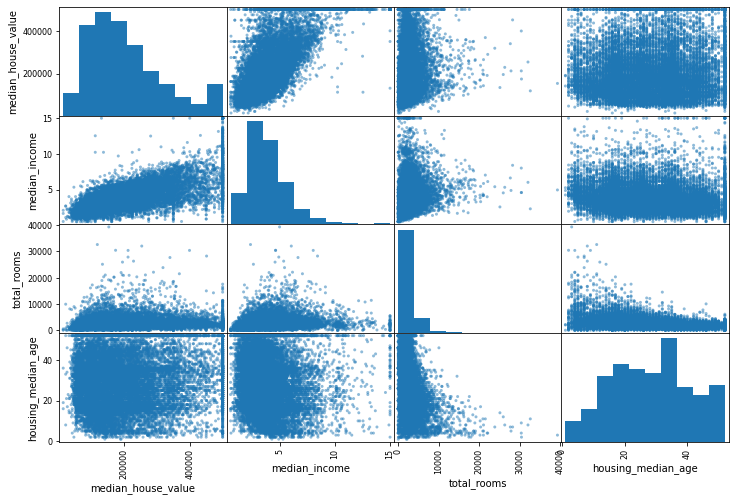

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In the main diagonal (top left to bottom right) Pandas displays a histogram of each attribute (other options are available; see Pandas’ documentation for more details).

The most promising attribute to predict the median house value is the median income. We can zoom it to see their correlation scatterplot:

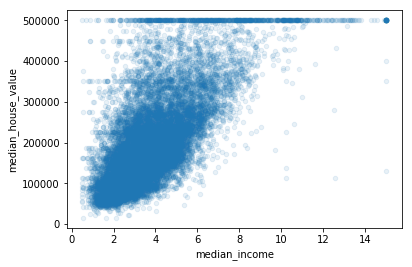

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
             alpha=0.1)

This plot reveals a few things:
1. The correlation is indeed very strong; we can clearly see the upward
trend and the points are not too dispersed. 
2. A price cap is clearly visible as a horizontal line at \\$500 000. 
3. The plot reveals other less obvious straight lines: a horizontal line
around \$450 000, another around \\$350 000, perhaps one around \\$280 000, and 
a few more below that.
   We may want to remove the corresponding districts to prevent the algorithms from learning to reproduce these data quirks.

### Experimenting with Attribute Combinations

Now we have an idea of a few ways to explore the data and gain insights. 

A few data quirks were identified that we may want to clean up before feeding the data to a Machine Learning algorithm

We found interesting correlations between attributes, in particular with the target attribute. 

We also noticed that some attributes have a tail-heavy distribution, so you may want to transform them (e.g., by computing their logarithm). 

A last thing we may want to do before actually preparing the data for Machine Learning algorithms is to try out various attribute combinations. 
   
   
**Example**: the total number of rooms in a district is not very
useful if we don’t know how many households there are. What we really want is the number of rooms per household. 
Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at.

Let’s create these new attributes:

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
    
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
    
housing["population_per_household"] = housing["population"]/housing["households"]

Let’s look at the correlation matrix:

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

The new `bedrooms_per_room` attribute is much more correlated with the 'median_house_value' than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.

The number of rooms per household is also more informative than the total
number of rooms in a district — obviously the larger the houses, the more expensive they are.

## Prepare the Data for Machine Learning Algorithms

We should write functions to prepare data for the Machine Learning algorithms:
1. This allows to reproduce these transformations easily on any dataset (e.g., the next time we get a fresh dataset).
2. Gradually build a library of transformation functions that can be reused in future projects.
3. These functions can be used to transform the new data before feeding it to the algorithms.
4. Will make it possible to easily try various transformations and see which combination of transformations works best.

Let's restart with a new clean training data set, and separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values:

In [ ]:
housing = train_set.drop('median_house_value', axis=1) # features
housing_labels = train_set["median_house_value"].copy() # labels

### Data Cleaning

Machine Learning algorithms cannot work with missing features. Let’s create a few functions to take care of them. 

We noticed that the `total_bedrooms` attribute has some missing values, so
let’s fix this. We have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

We can accomplish these using DataFrame methods: `dropna()`, `drop()`, and `fillna()`:

In [ ]:
housing.dropna(subset=["total_bedrooms"])   # option 1

housing.drop("total_bedrooms", axis=1)      # option 2

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)    # option 3

14196     627.0
8267      787.0
17445     331.0
14265     367.0
2271      431.0
          ...  
11284     201.0
11964     570.0
5390      569.0
860       597.0
15795    1315.0
Name: total_bedrooms, Length: 16512, dtype: float64

Scikit-Learn provides a handy class to take care of missing values: `Imputer`
 - First, create an Imputer instance, specifying that we want to replace each attribute’s missing values with the median of that attribute:

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute `ocean_proximity'

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now we can fit the imputer instance to the training data using the fit() method:

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

`imputer` has computed the median of each attribute and stored the result in its `statistics_` instance variable

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

Only the `total_bedrooms` attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live. So it is safer to apply the imputer to all the numerical attributes:

In [ ]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

Now we can use this “trained” `imputer` to transform the training set by replacing missing values by the learned medians:

In [ ]:
X = imputer.transform(housing_num)

The result of the previous code is a plain Numpy array containing the transformed features. 

If we want to put it back into a Pandas DataFrame:

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
# housing_num.columns

## Handling Text and Categorical Attributes

we left out the categorical attribute `ocean_proximity` because it is a text attribute so we cannot compute its median. 

Most Machine Learning algorithms prefer to work with numbers anyway so we can convert these text labels to numbers.

Scikit-Learn provides a transformer for this task called `LabelEncoder`:

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 4, 4, ..., 0, 0, 3])

We can use this numerical data in any ML algorithm. 
We can look at the mapping that this encoder has learned using the `classes_` attribute (“<1H OCEAN” is mapped to 0, “INLAND” is
mapped to 1, etc.):

In [ ]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


- A problem with this representation is that a ML algorithms will assume that two nearby values are more similar than two distant values. 

- Obviously this is not the case (for example, categories 0 and 4 are more similar than categories 0 and 1). 

- To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. 
   This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
   
Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors.
- Let’s encode the categories as one-hot vectors. Note that `fit_transform()` expects a 2D array, but `housing_cat_encoded` is a 1D array, so we need to reshape it:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

The output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when we have categorical attributes with thousands of categories.

After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for one 1 per row. 
- This use tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. 
- We can use a sparse matrix mostly like a normal 2D array,

If we want to convert it to a(dense) NumPy array, just call the `toarray()` method:

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the `LabelBinarizer` class:

In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

that returns a dense NumPy array by default. We can get a sparse matrix instead by passing `sparse_output=True` to the `LabelBinarizer` constructor:

In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom Transformers

- Scikit-Learn provides many useful transformers

- However, we need to write your own transformers for tasks such as custom cleanup operations or for combining specific attributes. 

- We want our transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines)
   - since Scikit-Learn relies on duck typing (not inheritance)
   - all we need to do is to create a class and implement three methods: `fit()` (returning `self`), `transform()`, and `fit_transform()`.
      (This last one is free by simply adding `TransformerMixin` as a base class)
   - if we add `BaseEstimator` as a base class (and avoid `*args` and `**kargs` in your constructor) you will get two extra methods (`get_params()` and ' `set_params()`) that will be useful for automatic hyperparameter tuning. 
   
Here is a small transformer class that adds the combined attributes discussed earlier:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter: `add_bedrooms_per_room`, set to `True` by default (it is often helpful to provide sensible defaults). 

This hyperparameter allows us to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

More generally, we can add a hyperparameter to gate any data preparation step that we are not 100% sure about. The more we automate these data preparation steps, the more combinations we can automatically try out, making it
much more likely that we will find a great combination (and saving a lot of time).

## Feature Scaling

One of the most important transformations we need to apply to data is feature scaling. 

Usually  Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. 
   - This is the case for the housing data: the median incomes ranges from about 6 to 39,320, while the total number of rooms  only range from 0 to 15.
   - Scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale: *min-max* scaling and *standardization*.